In [0]:
!git clone https://github.com/genn-team/genn.git --branch 4.1.0

Cloning into 'genn'...
remote: Enumerating objects: 1280, done.
remote: Counting objects: 100% (1280/1280), done.
remote: Compressing objects: 100% (1020/1020), done.
remote: Total 66665 (delta 622), reused 583 (delta 228), pack-reused 65385
Receiving objects: 100% (66665/66665), 207.86 MiB | 27.30 MiB/s, done.
Resolving deltas: 100% (46530/46530), done.
Note: checking out '37e7a83b1c2c5cfa158e46f4290acb24a58d6e7f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [0]:
!sudo apt-get install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (8,132 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: 

In [0]:
import os
os.environ['CUDA_PATH'] ='/usr/local/cuda'

In [0]:
os.chdir('genn/')
!make DYNAMIC=1 LIBRARY_DIRECTORY=`pwd`/pygenn/genn_wrapper/

make -C src/genn/genn
make[1]: Entering directory '/content/genn/src/genn/genn'
mkdir -p /content/genn/obj_dynamic/genn/genn
g++ -std=c++11 -Wall -Wpedantic -Wextra -MMD -MP -I/content/genn/include/genn/genn -I/content/genn/include/genn/third_party -fPIC -c -o /content/genn/obj_dynamic/genn/genn/synapseGroup.o synapseGroup.cc
mkdir -p /content/genn/obj_dynamic/genn/genn
g++ -std=c++11 -Wall -Wpedantic -Wextra -MMD -MP -I/content/genn/include/genn/genn -I/content/genn/include/genn/third_party -fPIC -c -o /content/genn/obj_dynamic/genn/genn/neuronModels.o neuronModels.cc
mkdir -p /content/genn/obj_dynamic/genn/genn
g++ -std=c++11 -Wall -Wpedantic -Wextra -MMD -MP -I/content/genn/include/genn/genn -I/content/genn/include/genn/third_party -fPIC -c -o /content/genn/obj_dynamic/genn/genn/initVarSnippet.o initVarSnippet.cc
mkdir -p /content/genn/obj_dynamic/genn/genn
g++ -std=c++11 -Wall -Wpedantic -Wextra -MMD -MP -I/content/genn/include/genn/genn -I/content/genn/include/genn/third_party -fP

In [0]:
!python setup.py develop

running develop
running egg_info
creating pygenn.egg-info
writing pygenn.egg-info/PKG-INFO
writing dependency_links to pygenn.egg-info/dependency_links.txt
writing requirements to pygenn.egg-info/requires.txt
writing top-level names to pygenn.egg-info/top_level.txt
writing manifest file 'pygenn.egg-info/SOURCES.txt'
writing manifest file 'pygenn.egg-info/SOURCES.txt'
running build_ext
building '_StlContainers' extension
swigging pygenn/genn_wrapper/generated/StlContainers.i to pygenn/genn_wrapper/generated/StlContainers_wrap.cpp
swig -python -c++ -relativeimport -outdir /content/genn/pygenn/genn_wrapper -I/content/genn/pygenn/genn_wrapper/include -I/content/genn/pygenn/genn_wrapper/generated -I/content/genn/pygenn/genn_wrapper/swig -py3 -o pygenn/genn_wrapper/generated/StlContainers_wrap.cpp pygenn/genn_wrapper/generated/StlContainers.i
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pygenn
creating build/temp.linux-x86_64-3.6/pygenn/genn_wrappe

# **IMPORTS**

In [0]:
#Import useful python libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
#Import useful PyGeNN Components
from pygenn import genn_model, genn_wrapper 
from pygenn.genn_model import (create_custom_neuron_class,
                               create_custom_current_source_class,
                               GeNNModel)

# **CODE**
Weight adjustment at a synapse is governed by the relative spike times of its pre- and postsynaptic neurons (Eq.). In the case of normal Hebbian STDP, if the postsynaptic spike is generated immediately after receiving the presynaptic spike,the presynaptic spike has a causal role in the output neuron ﬁring. The synaptic weight is thus increased (LTP). Conversely, if a postsynaptic spike occurs before the presynaptic spike, the strength is reduced (LTD), as seen in the equation below. 

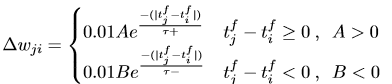

In the above, the ﬁrst case (Case 1) covers LTP and the second case (Case 2) covers LTD. Both casesaredecayingexponentialsthatdecaywiththe distancebetweenandpre-andpostsynapticspikes. A > 0 and B < 0 scale the amplitude of the exponential, and τ+ and τ− are the respective time constants. Eq describes Hebbian STDP`



In this example, we will be implementing STDP-Hebbian Learning with the following apparatus:

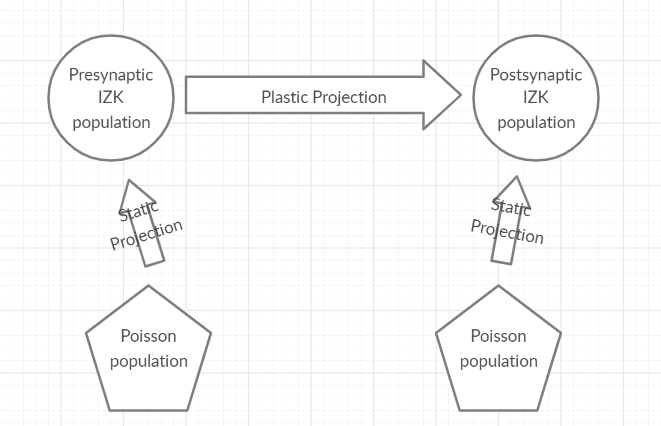


Building Model
Loading Model
Weight Initial
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Weight Final
[0.844713   0.5753498  0.7068282  0.89186025 0.8776838  0.1
 0.31009406 0.6800387  0.81859976 0.6935709  0.7054592  0.9794382
 0.6528433  0.80613077 0.36587968 0.26648134 0.3990686  0.34932512
 0.6593268  0.31399304 0.17848498 0.60752314 0.47424853 0.5088818
 0.7086956  0.4704073  0.6994586  0.7750857  0.9145617  0.93962586
 0.5613936  0.735164   0.6629369  0.38461688 1.         0.60572565
 0.2095423  0.6313775  0.98174465 1.         0.46698987 0.66338116
 0.697906   0.44185683 0.22789249 0.34350953 0.47967672 0.4787023
 0.22943977 0.8713089  0.1905995  0.2832971  0.5312861  0.8399572
 0.38208035 0.76341164 0.1965645  0.63939524 

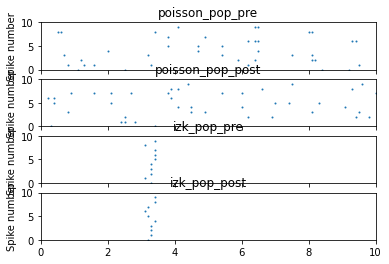

In [0]:
# ********************************************************************************
#                      Model Definitions
# ********************************************************************************
# STDP_Hebbian_Model
stdp_model = genn_model.create_custom_weight_update_class(
    "stdp_model", #unique model name
    param_names=["tauMinus", "tauPlus", "A", "B","gMax","gMin"],#Defining parameters which will remain common throughout
    var_name_types=[("g", "scalar")], #state variables to track each synaptic connection

# sim_code is called when a presynaptic spike occurs so, after you call $(addToInSyn, $(g)),
# you should be calculating the presynaptic after postsynaptic spike case
# i.e. where dt = $(t) - $(sT_post).
    sim_code=
        """
        $(addToInSyn, $(g));
        scalar dt = $(t) - $(sT_post);
        if (dt > 0) {
          scalar timing = exp(-dt / $(tauMinus));
          scalar newWeight = $(g) - ($(B) * timing);
          $(g) = fmax($(gMin), newWeight);
        }
        """,

# learn_post_code is called when a postsynaptic spike occurs so should only be handling the postsynaptic after presynaptic spike case
# and you should calculate dt (which will always be positive) with dt = $(t) - $(sT_pre)
    learn_post_code=
        """
        scalar dt = $(t) - $(sT_pre);
        if(dt > 0) {
            scalar timing = exp(-dt / $(tauPlus));
            scalar newWeight = $(g) + ($(A) * timing);
            $(g) = fmin($(gMax), newWeight);
        }
        """,

    is_pre_spike_time_required=True,
    is_post_spike_time_required=True
)



# ********************************************************************************
#                      Parameters and Hyperparameters
# ********************************************************************************

# Hyperparameters
# Global 
timestep = 0.1


# Neuron
n_pop = 10

# Parameters and initial values
izk_init = {"V": -60.0,
            "U": -20.0,
            "a": 0.02,
            "b": 0.2,
            "c": -65.0,
            "d": 8.0}


stdp_init = {"g":genn_model.init_var("Uniform",{"min":0.1, "max":1.0})}

stdp_params = {"tauMinus": 20.0, "tauPlus": 20.0, "A":0.1, "B":0.1, "gMax": 1.0, "gMin":0.1}


# ********************************************************************************
#                      Custom GeNN Models
# ********************************************************************************
#Create new network using single precision and generating code in "stdp_anti_hebbian_example"
model = genn_model.GeNNModel("float","stdp_anti_hebbian_example")


# Neuron populations
# You can view the documentation for PoissonNew here (http://genn-team.github.io/genn/documentation/4/html/dc/dc0/classNeuronModels_1_1PoissonNew.html)
poisson_pop_pre = model.add_neuron_population("poisson_pop_pre",n_pop,"PoissonNew",{"rate":500},{'timeStepToSpike':0.0})
poisson_pop_post = model.add_neuron_population("poisson_pop_post",n_pop,"PoissonNew",{"rate":500},{'timeStepToSpike':0.0})

# You can view the documentation for IzhikevichVariable here (http://genn-team.github.io/genn/documentation/4/html/dc/d87/classNeuronModels_1_1IzhikevichVariable.html)
izk_pop_pre = model.add_neuron_population("izk_pop_pre", n_pop, "IzhikevichVariable", {}, izk_init)
izk_pop_post = model.add_neuron_population("izk_pop_post", n_pop, "IzhikevichVariable", {}, izk_init)

neuron_layers = [poisson_pop_pre,poisson_pop_post,izk_pop_pre,izk_pop_post]

#Create synaptic connections between neuronal populations
# Documentation for StaticPulse can be viewed here: http://genn-team.github.io/genn/documentation/4/html/d9/d74/classWeightUpdateModels_1_1StaticPulse.html
syn_pi_pop = model.add_synapse_population("syn_pi_pop","SPARSE_INDIVIDUALG",genn_wrapper.NO_DELAY,  
    poisson_pop_pre,izk_pop_pre,"StaticPulse", {}, {"g": 5.0}, {}, {},
        "DeltaCurr", {}, {},genn_model.init_connectivity("OneToOne",{}))

syn_po_pop = model.add_synapse_population("syn_po_pop","SPARSE_INDIVIDUALG",genn_wrapper.NO_DELAY,
    poisson_pop_post,izk_pop_post,"StaticPulse", {}, {"g": 5.0}, {}, {},
        "DeltaCurr", {}, {},genn_model.init_connectivity("OneToOne",{}))

# Fundamentally, you can't use connectivity initialisers with DENSE connectivity only with SPARSE or BITMASK. 
# The differences are explained in the manual here http://genn-team.github.io/genn/documentation/4/html/d5/d39/subsect34.html 
# Although with PyGeNN you don't need to worry about the underlying data structure used for sparse connections.
syn_io_pop = model.add_synapse_population("syn_io_pop","DENSE_INDIVIDUALG",genn_wrapper.NO_DELAY,
    izk_pop_pre,izk_pop_post,stdp_model,stdp_params,stdp_init,{},{},
        "DeltaCurr", {}, {})



# ********************************************************************************
#                      Building and Simulation
# ********************************************************************************

# For displaying a smaller version of the graph
PRESENT_TIMESTEPS = 100.0

# Timesteps of progression
TIMESTEP = 0.1

n_stim_test = 5
n_stim_pairing = 20
dur_stim = 20


ISI = 90
start_test_pre_pairing = 200
start_pairing = 1500
start_test_post_pairing = 700

simtime = (start_pairing + start_test_post_pairing + ISI*(n_stim_pairing+n_stim_test) + 550.)


  

# Simulate
model.dT = TIMESTEP
# Use GeNN to generate simulation code for model
print("Building Model")
model.build()
# Load generated model into PyGeNN
print("Loading Model")
model.load()

# Retrieving Initial weights
weight_initial = syn_io_pop.get_var_values('g')

layer_spikes = [(np.empty(0), np.empty(0)) for _ in enumerate(neuron_layers)]



while model.timestep < simtime:
    
    # Loop through neuron layers
    for i, l in enumerate(neuron_layers):
        # Download spikes
        model.pull_current_spikes_from_device(l.name)

        # Add to data structure
        spike_times = np.ones_like(l.current_spikes) * model.t
        layer_spikes[i] = (np.hstack((layer_spikes[i][0], l.current_spikes)),
                           np.hstack((layer_spikes[i][1], spike_times)))
    
    # Advance simulation
    model.step_time()
    
# Retrieving Final weights
model.pull_var_from_device('syn_io_pop','g')
weight_final = syn_io_pop.get_var_values('g')

# Printing weights for comparison
print("Weight Initial")
print(weight_initial)
print("Weight Final")
print(weight_final)

# ----------------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Create a plot with axes for each
fig, axes = plt.subplots(len(neuron_layers), sharex=True)


# Loop through axes and their corresponding neuron populations
for a, s, l in zip(axes, layer_spikes, neuron_layers):
    # Plot spikes
    a.scatter(s[1], s[0], s=1)

    # Set title, axis labels
    a.set_title(l.name)
    a.set_ylabel("Spike number")
    a.set_xlim((0, PRESENT_TIMESTEPS * TIMESTEP))
    a.set_ylim((0, l.size))



# Show plot
plt.show()





